# Basics of twin4build
This notebook is an introduction to the basic functionality of the twin4build package. 

In [1]:
%pip install git+https://github.com/JBjoernskov/Twin4Build.git
import twin4build as tb

model = tb.Model(id="mymodel")
print(model)


+----------------------------------------------------+
|           Model overview    id: mymodel            |
+--------------------------------------------+-------+
| Number of components in simulation model:  |   0   |
+--------------------------------------------+-------+
|   Number of edges in simulation model:     |   0   |
+--------------------------------------------+-------+
|   Number of objects in semantic model:     |   0   |
+--------------------------------------------+-------+
|   Number of triples in semantic model:     |   0   |
+--------------------------------------------+-------+
|                                            |       |
|                                            |       |
+--------------------------------------------+-------+
|                     id                     | Class |
+--------------------------------------------+-------+


C:\Users\jabj\OneDrive - Syddansk Universitet\PhD_Project_Jakob\Twin4build\python\BuildingEnergyModel\Twin4Build\twin4build\utils\get_main_dir.py:12: UserWarning: Could not determine main module path, using temp dir: C:\Users\jabj\AppData\Local\Temp\1
  warnings.warn("Could not determine main module path, using temp dir: %s" % d)


Now, we will add components to the instantiated model. 
First, we instantiate a simple schedule which has no inputs and the output "scheduleValue".

In [2]:
# Define a schedule
# Other arguments such as "mondayRulesetDict" can also be added to define a more detailed schedule.
position_schedule = tb.ScheduleSystem(weekDayRulesetDict = {
                                        "ruleset_default_value": 0,
                                        "ruleset_start_minute": [0,0,0,0,0,0,0],
                                        "ruleset_end_minute": [0,0,0,0,0,0,0],
                                        "ruleset_start_hour": [6,7,8,12,14,16,18],
                                        "ruleset_end_hour": [7,8,12,14,16,18,22],
                                        "ruleset_value": [0,0.1,1,0,0,0.5,0.7]}, #35
                                        id="Position schedule")
print(position_schedule)

+---------------------------------------------+
| Component overview    id: Position schedule |
+-------------+-------------------------------+
|    input    |             output            |
+-------------+-------------------------------+
|             |         scheduleValue         |
+-------------+-------------------------------+


Next, we will we instantiate a damper component which has the input "damperPosition" and the output "airFlowRate".

In [3]:
# Define damper component
damper = tb.DamperSystem(nominalAirFlowRate = tb.PropertyValue(hasValue=1.6),
                        a=5,
                        id="Damper")
print(damper)

+----------------------------------+
| Component overview    id: Damper |
+------------------+---------------+
|      input       |     output    |
+------------------+---------------+
|  damperPosition  |  airFlowRate  |
+------------------+---------------+


Connect the "scheduleValue" output of the schedule to the "damperPosition" input of the damper.
Print the model once again to see the changes.

In [4]:
model.add_connection(position_schedule, damper, "scheduleValue", "damperPosition")
print(model)

+-------------------------------------------------------------+
|                Model overview    id: mymodel                |
+--------------------------------------------+----------------+
| Number of components in simulation model:  |       2        |
+--------------------------------------------+----------------+
|   Number of edges in simulation model:     |       1        |
+--------------------------------------------+----------------+
|   Number of objects in semantic model:     |       2        |
+--------------------------------------------+----------------+
|   Number of triples in semantic model:     |       0        |
+--------------------------------------------+----------------+
|                                            |                |
|                                            |                |
+--------------------------------------------+----------------+
|                     id                     |     Class      |
+---------------------------------------


Loading model...
   |___Drawing parsed object graph...done
   |___Drawing system graph...done
   |___Validating model...done
   |___Determining execution order...done
   |___Creating execution graph...done
   |___Drawing system graph without cycles...done
   |___Loading parameters...
+-------------------------------------------------------------+
|                Model overview    id: mymodel                |
+--------------------------------------------+----------------+
| Number of components in simulation model:  |       2        |
+--------------------------------------------+----------------+
|   Number of edges in simulation model:     |       1        |
+--------------------------------------------+----------------+
|   Number of objects in semantic model:     |       2        |
+--------------------------------------------+----------------+
|   Number of triples in semantic model:     |       0        |
+--------------------------------------------+----------------+
|         

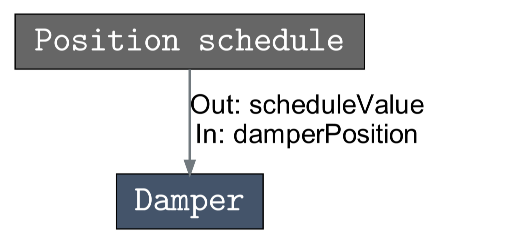

In [5]:
import matplotlib.pyplot as plt
import os
model.load()
system_graph = os.path.join(model.graph_path, "system_graph.png")
image = plt.imread(system_graph)
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

Now that we have a model, we can simulate it using the Simulator class. We will simulate the model for 2 days and plot the results.

100%|██████████| 288/288 [00:00<00:00, 13560.39it/s]


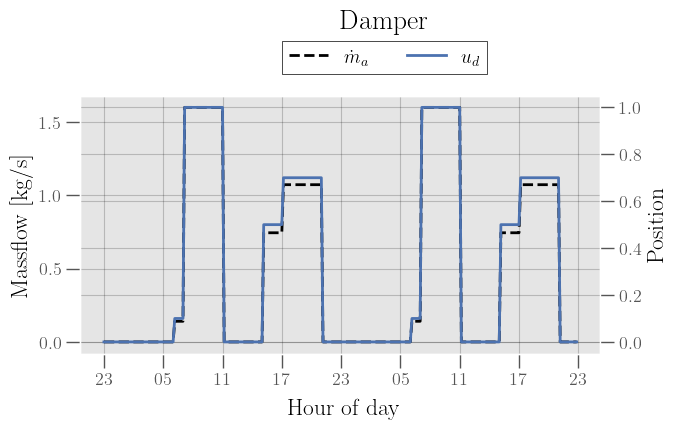

In [24]:
import datetime
from dateutil import tz
import twin4build.utils.plot.plot as plot
simulator = tb.Simulator()
stepSize = 600 #Seconds
startTime = datetime.datetime(year=2024, month=1, day=10, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))
endTime = datetime.datetime(year=2024, month=1, day=12, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))

# Simulate the model
simulator.simulate(model,
                    stepSize=stepSize,
                    startTime = startTime,
                    endTime = endTime)
plot.plot_damper(model, simulator, "Damper", show=True) #Set show=True to plot